# Intro to Deep Learning the Hard Way

So, we begin our discussion of deep learning by first investing neural networks, which forms the foundation of deep learning. We'll start small and then build up to a complex network, layer by layer. We'll also discuss how to train neural networks using back propagation.

## Let's get started with data
We'll begin our deep dive into NN's by first generating and inspecting the dataset we'll be using to train the network. We'll use a generator from sk-learn called make_circles, which generates a dataset that contains a small circle within a large one.

(-1.297456831984082,
 1.2516931200193102,
 -1.2424547417696608,
 1.274436574007915)

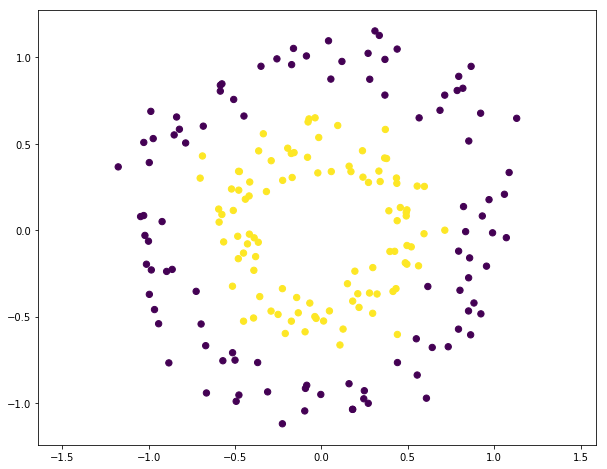

In [2]:
%matplotlib widget
%matplotlib inline
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

X, y = make_circles(200, noise=0.1, factor=0.5)
# X, y = make_moons(200, noise=0.1)
plt.scatter(X[:,0], X[:, 1], s=40, c=y)
plt.axis('equal')

# The Perceptron revisted
The goal is to train a neural network that predicts the correct class given the two features in vector form. That is, the goal is to input a feature vector $x$ into a function $f(x)$ that outputs the correct label for that input feature vector. In other words, we seek an $f$, such that 

$$f:x \mapsto y$$

Recall the perceptron learning algorithm. The hypothesis function was defined as follows:

$$h_\theta(x) = g(\theta^{T}x)$$

where $g(z)$ is the thresholding function:
$$g(z) = \begin{cases}
        1 & z\geq 0 \\
        0 & z \lt 0
        \end{cases}
$$

Assuming for example, that there are two features in the feature vector, we can generalize this archtecture with the following figure:

![](perceptron.png)

Note, during our treatment of deep learning, we make the following notation choices:

$$\mathbf{w} : \text{is the vector of weights}$$
$$\mathbf{x} : \text{is the vector of input features}$$
$$z : \text{pre-activation output}$$
$$g(z) : \text{the activation function}$$

The perceptron is an example of a single layer neural network. If we expand this idea to multiple layers, we have the following model:
![](https://www.researchgate.net/profile/Maria_Haritou/publication/291339457/figure/fig1/AS:334187497312256@1456687916125/Typical-structure-of-a-feed-forward-multilayer-neural-network.png)

Where we now have multiple layers, with the first layer where the input is fed into known as the input layer, one or more hidden layer, and finally an output layer. Each layer will have a set of weights, a bias, and an activation function. The goal is the same: to train the model, we vary the weights using an optimization algorithm (such as gradient descent) to minimize an objective function.

The connection configuration can be fully connected, that the output of every neuron connects to all the neurons in subsequent layers, or the interconnectivity can be specified. This architecture is known as a feed forward neural network. Desiging network architectures is as much art as it is science. We will be covering the most well known architectures and what problems those architectures are good for. But for now, let's get back to creating our neural network classifier.

## A basic neural network from scratch

In order to solve this classification problem, let's build a simple 3 layer neural network: one input layer, one hidden layer, and one output layer. The number of weights of the input layer is determined by the number of features. Similarly, the number weights in the output layer is determined by the number of classes that we have. We then choose the number of weights of the hidden layer. As we will see shortly, choosing the right number of hidden weights greatly affects performance. We also must choose an activation function for the hidden layer. In our case here, we will choose $tanh(.)$ which performs well for many problems. Additionally, since we are building a classifier, we'd like to output probabilities, so we'll use the softmax function, which we have seen before.

## The math behind the magic

Since we are defining a feedforward network, the network will be making predictions using forward propagation, that is, the inputs propagagte through the network from input to output. Ultimately, it just becomes several matrix multiplications and applications of the activation function. Considering that our problem here has two features in the input vector, we can calculation the prediction, $y$, as follows:

$$\mathbf{z}_1 = \mathbf{x}\mathbf{w}_1+b_1$$
$$\mathbf{a}_1 = tanh(\mathbf{z}_1)$$
$$\mathbf{z}_2 = \mathbf{a}_1\mathbf{w}_2 + b_2$$
$$\mathbf{\hat{y}} = softmax(\mathbf{z}_2)$$

where $\mathbf{z}_i$ is the weighted sum of the inputs of layer $i$ (with the bias term included) and $\mathbf{a}_i$ is the output of layer $i$ after applying the activation function. The goal is to learn the parameters of the network, $\mathbf{w}_i$ and $\mathbf{b}_i$ for every $i$, by training on the data. In our case, $i \in \{1, 2\}$. It would be beneficial to look at the actual sizes of the weight matrices. If we have 4 nodes for the hidden layer, then we have the following sizes for the weights and biases:
$$\mathbf{w}_1 \in \mathbb{R}^{2x4}$$
$$\mathbf{b}_1 \in \mathbb{R}^{4}$$
$$\mathbf{w}_2 \in \mathbb{R}^{4x2}$$
$$\mathbf{b}_2 \in \mathbb{R}^{2}$$

## How does this thing learn, anyways?

So, we seek learn the parameters of our network, i.e., finding $(\mathbf{w}_1, \mathbf{b}_1, \mathbf{w}_2, \mathbf{b}_2)$ that minimizes the error on the training data. But what is the error? Typically, we call this funciton the *loss function*. With softmax output layers, a common loss function is the [cross-entropy loss](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy), which is given by the following:

$$L(\mathbf{y}, \mathbf{\hat{y}})= -\frac{1}{N}\sum_{n \in N}\sum_{i \in C}\mathbf{y}_{n,i}log(\mathbf{\hat{y}}_{n, i})$$

Essentially, what this means is that the further away the correct labels($\mathbf{y}$) and the predicted labels ($\mathbf{\hat{y}}$) are, the larger the loss will be.

We can use gradient descent to find the minimum of the loss function. As we know, we need to calculate the gradients of the loss function with respect to the parameters of the model. In order to do that, we will use the backpropagation algorithm, which calculates the gradients starting from the output, and propogates them updates backwards through the network. The proof of backpropagation will be discussed during the video notes. For now, let's just define what that would look like:

$$\mathbf{\delta}_3 = \mathbf{\hat{y}} - \mathbf{y}$$
$$\mathbf{\delta}_2 = (1 - tanh^2(\mathbf{z}_1))\cdot\mathbf{\delta}_3\mathbf{w}_3^T$$
$$\frac{\partial L}{\partial \mathbf{w}_2} = \mathbf{a}_1^T\delta_3$$
$$\frac{\partial L}{\partial \mathbf{b}_2} = \delta_3$$
$$\frac{\partial L}{\partial \mathbf{w}_1} = \mathbf{x}^T\delta_2$$
$$\frac{\partial L}{\partial \mathbf{b}_1} = \delta_2$$

## Let's dig in
Now that we have the fundamental maths out of the way, let's go ahead and implement this network and train it.

In [3]:
# training set size
num_examples = len(X)

# input layer dimensionality
nn_input_dim = 2
# output layer dimensionality
nn_output_dim = 2

# gradient descent parameters
# learning rate for gradient descent
alpha = 0.01
# regularization strength
reg_lambda = 0.01


#  function to plot a decision boundary.

def plot_decision_boundary(pred_func):
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

#  function to evaluate the total loss on the dataset
def calculate_loss(model):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    # calculate our predictions using forward prop
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # calculate the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))

    return 1./num_examples * data_loss



# function to predict an output (0 or 1)
def predict(model, x):
    # get model parameters
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    # calculate the outputs
    
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    
    # softmax
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # find the index with the largest value
    return np.argmax(probs, axis=1)

# function that builds and trains the model
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    w2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # we'll store the model params in this dictionary
    model = {}
    
    # gradient descent. For each batch...
    for i in range(0, num_passes):

        # forward propagation
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # back propagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # regularization terms (b1 and b2 don't have regularization terms)
        dw2 += reg_lambda * w2
        dw1 += reg_lambda * w1

        # gradient descent parameter update
        w1 += -alpha * dw1
        b1 += -alpha * db1
        w2 += -alpha * dw2
        b2 += -alpha * db2
        
        # Assign new parameters to the model
        model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        
        # print the loss every so often
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

In [4]:
# Build a model with a 4-dimensional hidden layer
model = build_model(4, print_loss=True)

Loss after iteration 0: 0.692533
Loss after iteration 1000: 0.034611
Loss after iteration 2000: 0.026699
Loss after iteration 3000: 0.023434
Loss after iteration 4000: 0.022261
Loss after iteration 5000: 0.021720
Loss after iteration 6000: 0.021395
Loss after iteration 7000: 0.021185
Loss after iteration 8000: 0.021044
Loss after iteration 9000: 0.020949
Loss after iteration 10000: 0.020882
Loss after iteration 11000: 0.020836
Loss after iteration 12000: 0.020803
Loss after iteration 13000: 0.020780
Loss after iteration 14000: 0.020763
Loss after iteration 15000: 0.020751
Loss after iteration 16000: 0.020742
Loss after iteration 17000: 0.020736
Loss after iteration 18000: 0.020731
Loss after iteration 19000: 0.020728


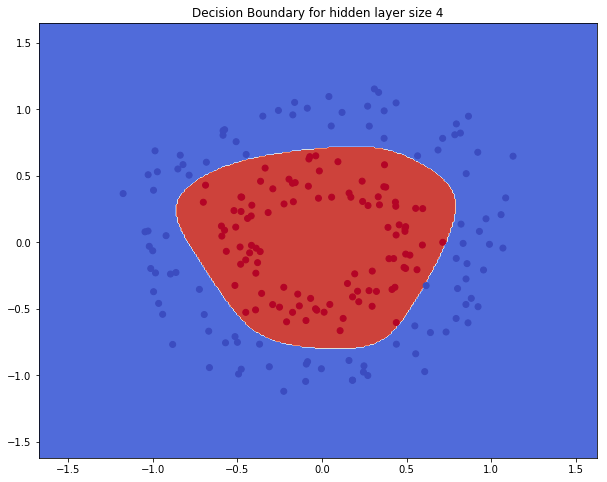

In [5]:
# show the decision boundary
plt.title("Decision Boundary for hidden layer size 4")
plot_decision_boundary(lambda x: predict(model, x))